In [2]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt



from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 


from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")

df=pd.read_csv('vaccination_all_tweets.csv')

In [3]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40166,1373522034903420929,Stankevicius International,"Dublin, Ireland",Professional trading consultant specializing i...,2020-06-30 12:31:42,16,3,0,False,2021-03-21 06:29:06,"Selling: #NitrileGloves, #1860 #FaceMasks, #Va...","['NitrileGloves', 'FaceMasks', 'Vaccines', 'Sp...",IFTTT,1,0,False
40167,1373517049184587776,Emanuele Capobianco,"Geneva, Switzerland","Director Health & Care, International Federati...",2009-04-13 09:56:49,3242,824,5665,True,2021-03-21 06:09:17,Limited vaccine manufacturing capacity is a ma...,['covid19'],Twitter for iPhone,0,2,False
40168,1373514710033821705,RT,NaN,"Freedom over censorship, truth over narrative\...",2009-08-11 06:12:45,2996352,680,1880,True,2021-03-21 06:00:00,Trust in #AstraZeneca jab in Europe has been s...,['AstraZeneca'],Twitter Media Studio,25,49,False
40169,1373512948417695746,Sunday Observer,Sri Lanka,Sri Lanka's oldest and the most circulated wee...,2017-02-07 02:59:59,6590,75,455,False,2021-03-21 05:53:00,"State Minister of Production, Supply and Regul...",NaN,TweetDeck,1,2,False


## Sentiment analysis

In [5]:
#use sentiment transformer vader embedding bert source: https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert 



sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [6]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

In [7]:
df['sentiment'] = df['text'].apply(lambda x: find_sentiment(x))

In [8]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,Neutral
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40166,1373522034903420929,Stankevicius International,"Dublin, Ireland",Professional trading consultant specializing i...,2020-06-30 12:31:42,16,3,0,False,2021-03-21 06:29:06,"Selling: #NitrileGloves, #1860 #FaceMasks, #Va...","['NitrileGloves', 'FaceMasks', 'Vaccines', 'Sp...",IFTTT,1,0,False,Neutral
40167,1373517049184587776,Emanuele Capobianco,"Geneva, Switzerland","Director Health & Care, International Federati...",2009-04-13 09:56:49,3242,824,5665,True,2021-03-21 06:09:17,Limited vaccine manufacturing capacity is a ma...,['covid19'],Twitter for iPhone,0,2,False,Negative
40168,1373514710033821705,RT,NaN,"Freedom over censorship, truth over narrative\...",2009-08-11 06:12:45,2996352,680,1880,True,2021-03-21 06:00:00,Trust in #AstraZeneca jab in Europe has been s...,['AstraZeneca'],Twitter Media Studio,25,49,False,Positive
40169,1373512948417695746,Sunday Observer,Sri Lanka,Sri Lanka's oldest and the most circulated wee...,2017-02-07 02:59:59,6590,75,455,False,2021-03-21 05:53:00,"State Minister of Production, Supply and Regul...",NaN,TweetDeck,1,2,False,Neutral


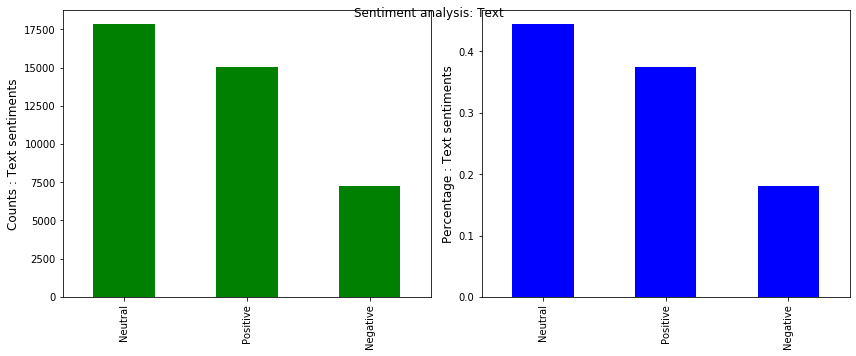

In [10]:
plot_sentiment(df, 'sentiment', 'Text')

In [12]:
final_df=df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source'])

In [24]:

final_df[['text','sentiment']].head(1)

,text,sentiment
0,Same folks said daikon paste could treat a cyt...,Positive


## WordCloud 

In [27]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [30]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

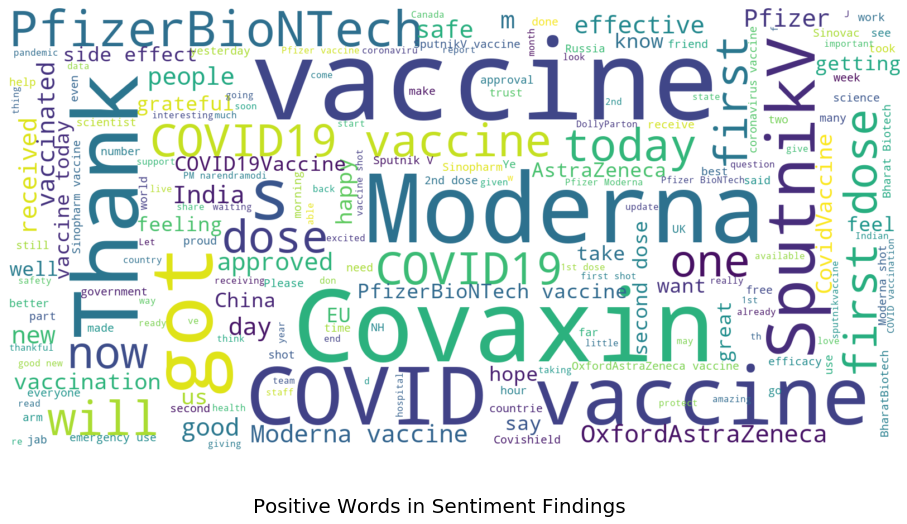

In [31]:
show_wordcloud(df.loc[df['sentiment']=='Positive', 'text'], title = 'Positive Words in Sentiment Findings')

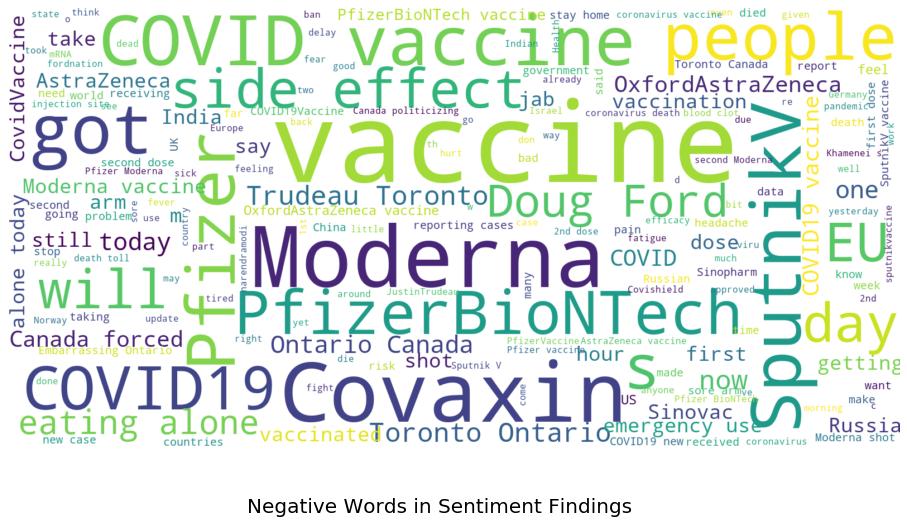

In [32]:
show_wordcloud(df.loc[df['sentiment']=='Negative', 'text'], title = 'Negative Words in Sentiment Findings')

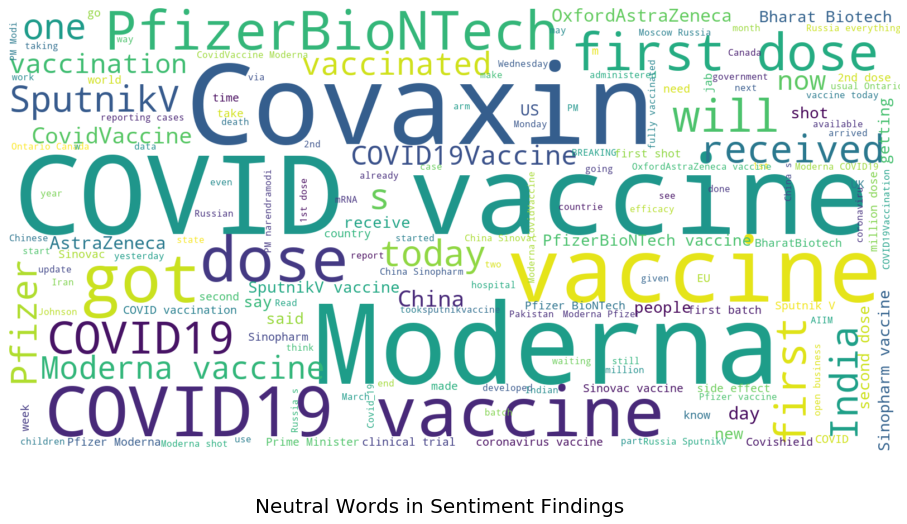

In [33]:
show_wordcloud(df.loc[df['sentiment']=='Neutral', 'text'], title = 'Neutral Words in Sentiment Findings')